# Chapter 2 - Demo Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Đọc dữ liệu, tiền xử lý dữ liệu

In [2]:
df = pd.read_csv('Data\location_rev.csv')
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [3]:
df.describe()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38433.469330,3.397000,31360.668500,1597.200000,3351.199000,11.041000
std,11665.825242,1.016082,3943.278358,496.874663,975.664263,3.034885
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30277.897500,3.000000,28792.592500,1253.000000,2689.250000,9.000000
50%,38323.095000,3.000000,31134.555000,1605.000000,3353.000000,11.000000
75%,45894.670000,4.000000,34050.992500,1925.250000,4017.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


In [4]:
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


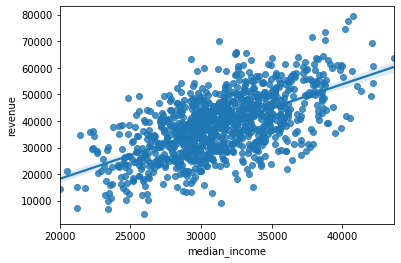

In [5]:
sns.regplot(data=df, x= 'median_income', y='revenue')
plt.show()

C:\Users\chuha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


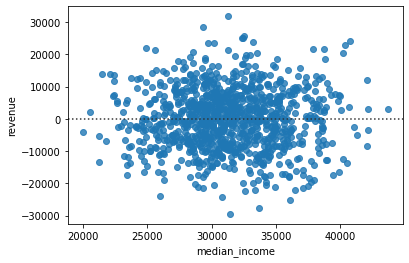

In [6]:
sns.residplot(df.median_income, df.revenue)
plt.show()#residue mà lớn như cái vòng tròn to thì R^2 nhỏ->model ko phù hợp

In [7]:
# Chuẩn bị dữ liệu training data/ test data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X1 = df[['median_income']]# df
y1 = df['revenue']# series

In [10]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 42)

# Linear Regression
## Simple Linear Regression: Xây dựng & đánh giá model

In [11]:
# Load module, tạo đối tượng linear regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()
model.fit(X1_train,y1_train)

LinearRegression()

In [14]:
intercept = model.intercept_
slope = model.coef_[0] # [0] vì là hệ số góc đầu tiên, nếu có hệ số góc thứ 2 thì se là [1]
print(intercept,slope)

-17944.393212607967 1.8044776691444901


In [15]:
y1_pred = model.predict(X1_test)

In [16]:
intercept = model.intercept_
slope = model.coef_[0]

In [17]:
print(intercept, slope)

-17944.393212607967 1.8044776691444901


In [18]:
# Đánh giá model

In [19]:
# R^2 cho toàn bộ dữ liệu
model.score(X1, y1)

0.3618738533973396

In [20]:
# R^2 khi train
model.score(X1_train, y1_train)#underfitting->trên train ko cao thì trên test cũng kocao

0.37376263809946475

In [21]:
# R^2 khi test
model.score(X1_test, y1_test)

0.3246804918433005

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
mse = mean_squared_error(y1_pred, y1_test)
print(mse)

90952579.47704405


In [24]:
mae = mean_absolute_error(y1_pred, y1_test)
print(mae)#so vs std của revenue trên bảng describe bên trên=11.000 thì quá lớn->mô hình này ko đc

7751.936386800821


- Đặt giới hạn trục x và y là 10.000 để chúng ta có được cái nhìn rõ hơn về vị trí của hầu hết các điểm dữ liệu. 
- Thêm line có độ dốc 1 đóng vai trò là tham chiếu. Nếu tất cả các điểm nằm trên line này, điều đó có nghĩa là có một mối quan hệ hoàn hảo giữa thực tế  và dự đoán.

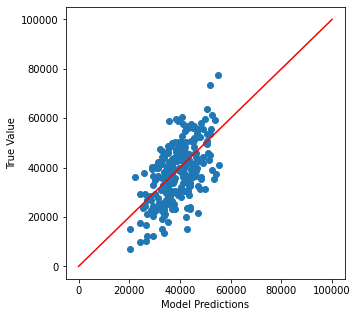

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(model.predict(X1_test),y1_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], '-', color = 'r')
plt.show()#nó ko rải đều đg thẳng->ko ổn ; trong word còn vẽ thêm cái distplot

In [26]:
#Trên test cũng rất tệ. KL:độ chính xác trên cả train và test đều rất tệ-> ko dùng simple linear đc (phái tính R^2 trên cả test)

## Multiple Linear Regression - Xây dựng & đánh giá model

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df[['median_income',
        'population_density',
        'location_age','num_competitors','num_loyalty_members'
       ]]
y = df['revenue']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 1)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
print(model.intercept_)
print(model.coef_)

-50496.26205253087
[ 1.71802482e+00  4.27074727e+00  2.08341967e+03 -2.26285773e+03
  3.50154612e+00]


In [33]:
y_pred = model.predict(X_test)

In [34]:
# Đánh giá model

In [35]:
model.score(X, y)

0.8128336931474242

In [36]:
model.score(X_train, y_train)

0.8092921126480103

In [37]:
model.score(X_test, y_test)# khá ok

0.8233368832578385

In [38]:
mse = mean_squared_error(y_pred, y_test)
print(mse)

23596856.091252755


In [39]:
mae = mean_absolute_error(y_pred, y_test)
print(mae)# đã giảm hơn rát nhiều so vs con số 7900 của simple linear

3920.6020598484047


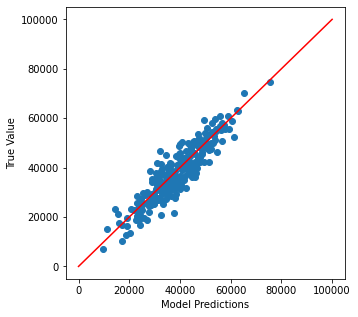

In [40]:
plt.figure(figsize=(5,5))
plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], '-', color = 'r')
plt.show()# đã trải dài hơn

C:\Users\chuha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\chuha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\chuha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

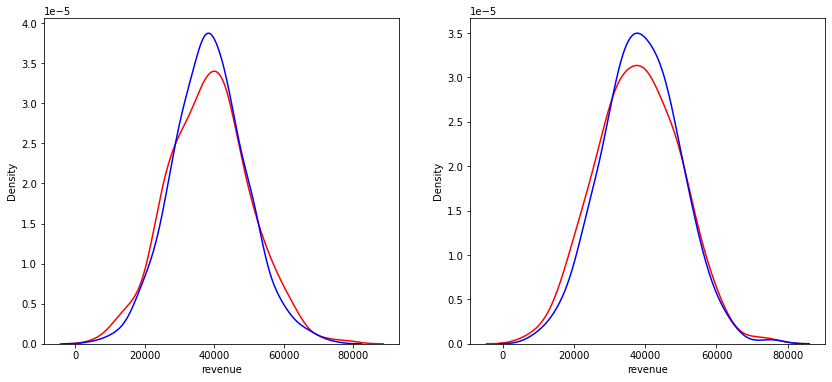

In [41]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Actual Train Values")
sns.distplot(model.predict(X_train), hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(model.predict(X_test), hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)

plt.show()# đã khớp hơn

In [42]:
#mô hình này ok nên sẽ dùng nso để dự báo

In [43]:
X_new = pd.DataFrame({
    'median_income': [30000],
    'population_density': [2000],
    'location_age': [10],'num_competitors':[2],'num_loyalty_members':[1500]
})

In [44]:
y_new = model.predict(X_new)
print(y_new)

[31146.77753589]


In [45]:
from scipy.stats.stats import pearsonr

In [46]:
pearsonr(model.predict(X_test),y_test)

(0.9094512849625142, 1.7029544729142659e-96)

### Lựa chọn thuộc tính 

#### Cách 1:Sử dụng Selection K Best

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [48]:
# Apply SelectKBest class to extract all best features
bestfeatures = SelectKBest(score_func=f_regression, k='all')#f_regression vì đây là bài toán tuyến tính
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [49]:
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# Sorting in descending order 
featureScores.sort_values("Score", ascending = False, inplace = True)
print(featureScores)  

                 Specs       Score
0        median_income  566.922357
2         location_age  439.125397
1   population_density  107.360798
4  num_loyalty_members   30.949544
3      num_competitors   25.117590


In [50]:
#cách 2:dùng corr(); Correlation Matrix with Heatmap
corrmat = df.corr()

In [51]:
corrmat

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


In [52]:
##chọn nhũng cái gần 1 nhất. nhìn bảng là quá ok rồi ko cần vẽ thêm heatmap nữa

In [53]:
top_corr_features = corrmat.index
top_corr_features

Index(['revenue', 'num_competitors', 'median_income', 'num_loyalty_members',
       'population_density', 'location_age'],
      dtype='object')

In [54]:
import matplotlib
matplotlib.__version__

'3.4.2'

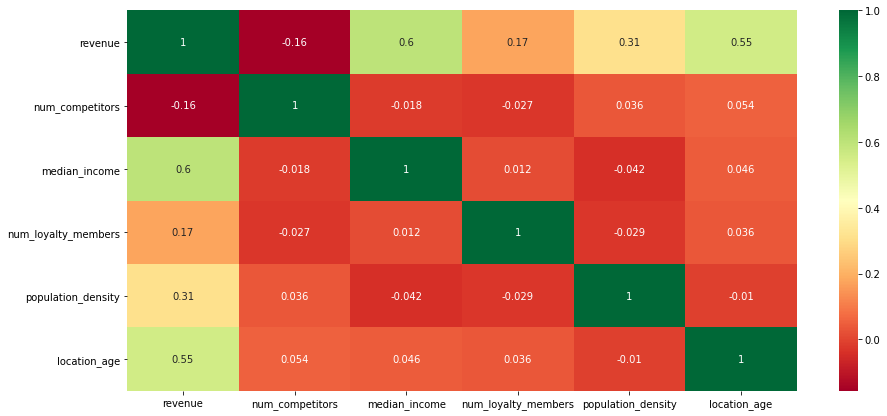

In [55]:
plt.figure(figsize=(15,7))
# plot heat map
g=sns.heatmap(df[top_corr_features].corr(),cmap="RdYlGn", annot=True) # annot=True: nếu muốn in cả giá trị
plt.show()

### Sau khi lựa chọn thuộc tính => áp dụng lại thuật toán

In [56]:
# 3 thuộc tính có score cao nhất
X2 = df[['median_income', 'population_density', 'location_age']]
y2 = df['revenue']

In [57]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 100)

In [58]:
model2 = LinearRegression()
model2.fit(X2_train,y2_train)

LinearRegression()

In [59]:
model2.score(X2, y2)

0.7552028859956076

In [60]:
model2.score(X2_train, y2_train)

0.7526411491478369

In [61]:
model2.score(X2_test, y2_test)

0.7632552854044201

In [62]:
mean_squared_error(model2.predict(X2_test), y2_test)

30672514.389709026

In [63]:
mean_absolute_error(model2.predict(X2_test), y2_test)

4358.312766077768

# Polynormial Regression
## Simple Polynormial Regression - Xây dựng & đánh giá model

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [65]:
pr_1=PolynomialFeatures(degree=2)
pr_1

PolynomialFeatures()

In [66]:
X_pr=pr_1.fit_transform(X)


In [67]:
X.shape, X_pr.shape# số features cũ và số features sau khi nâng bậc

((1000, 5), (1000, 21))

In [68]:
X[:5]

,median_income,population_density,location_age,num_competitors,num_loyalty_members
0,30527.57,3302.0,12.0,3.0,1407.0
1,30185.49,4422.0,11.0,3.0,1025.0
2,32182.24,3260.0,12.0,1.0,1498.0
3,29728.65,4325.0,10.0,5.0,2340.0
4,30691.17,3774.0,11.0,4.0,847.0


In [69]:
X_pr[:5]

array([[1.00000000e+00, 3.05275700e+04, 3.30200000e+03, 1.20000000e+01,
        3.00000000e+00, 1.40700000e+03, 9.31932530e+08, 1.00802036e+08,
        3.66330840e+05, 9.15827100e+04, 4.29522910e+07, 1.09032040e+07,
        3.96240000e+04, 9.90600000e+03, 4.64591400e+06, 1.44000000e+02,
        3.60000000e+01, 1.68840000e+04, 9.00000000e+00, 4.22100000e+03,
        1.97964900e+06],
       [1.00000000e+00, 3.01854900e+04, 4.42200000e+03, 1.10000000e+01,
        3.00000000e+00, 1.02500000e+03, 9.11163807e+08, 1.33480237e+08,
        3.32040390e+05, 9.05564700e+04, 3.09401272e+07, 1.95540840e+07,
        4.86420000e+04, 1.32660000e+04, 4.53255000e+06, 1.21000000e+02,
        3.30000000e+01, 1.12750000e+04, 9.00000000e+00, 3.07500000e+03,
        1.05062500e+06],
       [1.00000000e+00, 3.21822400e+04, 3.26000000e+03, 1.20000000e+01,
        1.00000000e+00, 1.49800000e+03, 1.03569657e+09, 1.04914102e+08,
        3.86186880e+05, 3.21822400e+04, 4.82089955e+07, 1.06276000e+07,
        3.9120

In [70]:
X1_pr_train, X1_pr_test, y1_pr_train, y1_pr_test = train_test_split(X_pr, y1, 
                                                                    random_state = 100)

In [71]:
lm1_t = LinearRegression()

In [72]:
lm1_t.fit(X1_pr_train, y1_pr_train)

LinearRegression()

In [73]:
lm1_t.score(X_pr, y1)

0.8150761058386731

In [74]:
lm1_t.score(X1_pr_train, y1_pr_train)# thấy nâng bậc nên cũng thế,R^2 chả tăng tí gì nên dùng multiple regression là ok r

0.8144937921706376

In [75]:
lm1_t.score(X1_pr_test, y1_pr_test)

0.8168340391566487

In [76]:
mean_squared_error(lm1_t.predict(X1_pr_test), y1_pr_test)

23730880.663037468

In [77]:
mean_absolute_error(lm1_t.predict(X1_pr_test), y1_pr_test)

3976.944427449812

## Multiple Polynormial Regression - Xây dựng & đánh giá model

In [78]:
pr2=PolynomialFeatures(degree=2)
pr2

PolynomialFeatures()

In [79]:
X2_pr=pr2.fit_transform(X2)

In [80]:
X2.shape, X2_pr.shape

((1000, 3), (1000, 10))

In [81]:
X2[:5]

,median_income,population_density,location_age
0,30527.57,3302.0,12.0
1,30185.49,4422.0,11.0
2,32182.24,3260.0,12.0
3,29728.65,4325.0,10.0
4,30691.17,3774.0,11.0


In [84]:
X2_pr[:5]

array([[1.00000000e+00, 3.05275700e+04, 3.30200000e+03, 1.20000000e+01,
        9.31932530e+08, 1.00802036e+08, 3.66330840e+05, 1.09032040e+07,
        3.96240000e+04, 1.44000000e+02],
       [1.00000000e+00, 3.01854900e+04, 4.42200000e+03, 1.10000000e+01,
        9.11163807e+08, 1.33480237e+08, 3.32040390e+05, 1.95540840e+07,
        4.86420000e+04, 1.21000000e+02],
       [1.00000000e+00, 3.21822400e+04, 3.26000000e+03, 1.20000000e+01,
        1.03569657e+09, 1.04914102e+08, 3.86186880e+05, 1.06276000e+07,
        3.91200000e+04, 1.44000000e+02],
       [1.00000000e+00, 2.97286500e+04, 4.32500000e+03, 1.00000000e+01,
        8.83792631e+08, 1.28576411e+08, 2.97286500e+05, 1.87056250e+07,
        4.32500000e+04, 1.00000000e+02],
       [1.00000000e+00, 3.06911700e+04, 3.77400000e+03, 1.10000000e+01,
        9.41947916e+08, 1.15828476e+08, 3.37602870e+05, 1.42430760e+07,
        4.15140000e+04, 1.21000000e+02]])

In [ ]:
X2_pr_train, X2_pr_test, y2_pr_train, y2_pr_test = train_test_split(X2_pr, y2, 
                                                                    random_state = 100)

In [ ]:
lm2_t = LinearRegression()

In [ ]:
lm2_t.fit(X2_pr_train, y2_pr_train)

LinearRegression()

In [ ]:
lm2_t.score(X2_pr, y2)

0.7575929999543383

In [ ]:
lm2_t.score(X2_pr_train, y2_pr_train)

0.758092420422708

In [ ]:
lm2_t.score(X2_pr_test, y2_pr_test)

0.7558605048424545

In [ ]:
mean_squared_error(lm2_t.predict(X_pr_test), y_pr_test)

NameError: name 'X_pr_test' is not defined

In [ ]:
mean_absolute_error(lm2_t.predict(X_pr_test), y_pr_test)